freq 2011 from http://dict.ruslang.ru/freq.php

In [20]:
from tg.grammar_ru import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

FOLDER = Loc.data_cache_path/'Rowling'
db = DataBundle.load(FOLDER/'bundle.zip')

freq_dict = Loc.data_cache_path/'Freq2011'/'freqrnc2011.csv'
freqs = pd.read_csv(freq_dict, sep='\t')

In [2]:
freqs = freqs[freqs['Lemma'] != freqs['Lemma'].str.upper()]
freqs['Lemma'] = freqs['Lemma'].str.lower()
freqs

Lemma   PoS  Freq(ipm)    R   D    Doc
0            а  conj     8198.0  100  97  32332
1            а  intj       19.8   99  90    757
2            а  part        6.1   59  79    128
3            а     s        2.7   59  85    160
4           аа  intj        1.5   47  80     68
...        ...   ...        ...  ...  ..    ...
52133  ящерица     s        3.6   77  74    158
52134   ящерка     s        0.4   27  82     33
52135     ящик     s       75.4  100  94   1810
52136   ящичек     s        3.4   80  89    212
52137     ящур     s        0.5   23  62     23

[51894 rows x 6 columns]

In [3]:
words_copy = db.words
words_copy = words_copy.merge(db.nfs.rename(columns={'cnt': 'nf_cnt'}), left_on='nf_n', right_index=True)
words_copy['nf'] = words_copy['nf'].str.replace('ё','е')
not_intersected = words_copy[~words_copy.nf.isin(freqs['Lemma'])].sort_values(by=['nf_cnt'], ascending=False)
not_intersected.iloc[:20]

word    cnt  cap_cnt  is_name   nf_n   nf_rule        nf  nf_cnt
word_n                                                                        
323        <defis>  23659        0    False      1    preset   <defis>   23659
5980           рон   4503     4503     True  15710  pymorphy       рон    6181
33945        ронов      2        1    False  15710  pymorphy       рон    6181
16928         роне     14       14     True  15710  pymorphy       рон    6181
7300          рону    331      331     True  15710  pymorphy       рон    6181
7099         роном    290      290     True  15710  pymorphy       рон    6181
6711          рона   1041     1041     True  15710  pymorphy       рон    6181
7875      гермиону    361      361     True   2718  pymorphy  гермиона    5343
7713      гермионе    288      287     True   2718  pymorphy  гермиона    5343
7009     гермионой    338      338     True   2718  pymorphy  гермиона    5343
6100      гермионы    437      437     True   2718  pymorphy  гермиона    5343
5047      гермиона   3919     3919     True   2718  pymorphy  гермиона    5343
2882     дамблдора    735      735     True  20324      stem  дамблдор    3262
3031     дамблдоре     24       24     True  20324      stem  дамблдор    3262
2960    дамблдором    113      113     True  20324      stem  дамблдор    3262
29056    дамблдоры      3        3     True  20324      stem  дамблдор    3262
2040     дамблдору    184      184     True  20324      stem  дамблдор    3262
1376      дамблдор   2195     2195     True  20324      stem  дамблдор    3262
29035   дамблдорам      1        1     True  20324      stem  дамблдор    3262
14164   дамблдоров      7        7     True  20324      stem  дамблдор    3262

In [4]:
not_intersected.iloc[-20:]

word  cnt  cap_cnt  is_name   nf_n   nf_rule  \
word_n                                                           
50793     заржавленной    1        0    False   4830  pymorphy   
50796        пеструшки    1        0    False  11408  pymorphy   
22795        оросилась    1        0    False  10105  pymorphy   
22682           крапин    1        0    False   6535  pymorphy   
22609    невыносимости    1        0    False   8523  pymorphy   
50890          доброшу    1        0    False   3476  pymorphy   
50922         побесить    1        0    False  11621  pymorphy   
50951       затыкается    1        0    False   5028  pymorphy   
50970   самотасующихся    1        0    False  15918  pymorphy   
51128        елейность    1        0    False   3920  pymorphy   
51157        грязнущий    1        0    False   3105  pymorphy   
51212      арахисового    1        0    False    174  pymorphy   
22597       поздновато    1        0    False  12234  pymorphy   
51309          вестимо    1        0    False   1232  pymorphy   
51364          докатил    1        0    False   3539  pymorphy   
51463    сплющившегося    1        0    False  17191  pymorphy   
51477         апперкот    1        0    False    165  pymorphy   
51478           провис    1        0    False  14067  pymorphy   
51517    аквамариновом    1        0    False     68  pymorphy   
71459        прислоняя    1        0    False  13860  pymorphy   

                    nf  nf_cnt  
word_n                          
50793        заржавить       1  
50796        пеструшка       1  
22795        ороситься       1  
22682          крапина       1  
22609    невыносимость       1  
50890        добросить       1  
50922         побесить       1  
50951       затыкаться       1  
50970   самотасоваться       1  
51128        елейность       1  
51157         грязнуть       1  
51212       арахисовый       1  
22597      поздноватый       1  
51309         вестимый       1  
51364         докатить       1  
51463       сплющиться       1  
51477         апперкот       1  
51478           провис       1  
51517    аквамариновый       1  
71459       прислонять       1

In [5]:
words_copy = words_copy.rename(columns={'is_name': 'is_name_naive'})
words_copy['in_freq'] = words_copy.nf.isin(freqs.Lemma)
words_copy['in_freq_prop'] = words_copy.nf.isin(freqs[freqs.PoS == 's.PROP'].Lemma)
words_copy['big_enough_nf_cnt'] = words_copy.nf_cnt > 10
words_copy['is_name_by_cnt'] = ~words_copy.in_freq & words_copy.big_enough_nf_cnt
words_copy

word  cnt  cap_cnt  is_name_naive   nf_n   nf_rule          nf  \
word_n                                                                         
0             семь   91       14          False  16244  pymorphy        семь   
4063          семи   13        0          False  16244  pymorphy        семь   
1             книг   97        1          False   6158  pymorphy       книга   
39           книгу  129        1          False   6158  pymorphy       книга   
77           книге   48        1          False   6158  pymorphy       книга   
...            ...  ...      ...            ...    ...       ...         ...   
71564   контролера    1        0          False   6370  pymorphy   контролер   
71567   непокрытой    1        0          False   8834  pymorphy  непокрытый   
71569        майке    1        0          False   7167  pymorphy       майка   
71575   побаловать    1        0          False  11603  pymorphy  побаловать   
71593        кряду    1        0          False   6692  pymorphy       кряду   

        nf_cnt  in_freq  in_freq_prop  big_enough_nf_cnt  is_name_by_cnt  
word_n                                                                    
0          104     True         False               True           False  
4063       104     True         False               True           False  
1          547     True         False               True           False  
39         547     True         False               True           False  
77         547     True         False               True           False  
...        ...      ...           ...                ...             ...  
71564        1     True         False              False           False  
71567        1     True         False              False           False  
71569        1     True         False              False           False  
71575        1     True         False              False           False  
71593        1     True         False              False           False  

[71597 rows x 12 columns]

In [6]:
len(words_copy[words_copy['is_name_by_cnt']]), len(words_copy[words_copy['is_name_naive']])

(3086, 3872)

In [7]:
words_copy = words_copy[['nf', 'nf_n', 'nf_cnt', 'is_name_naive', 'in_freq_prop', 'is_name_by_cnt']].drop_duplicates('nf')
len(words_copy[words_copy['is_name_by_cnt']]), len(words_copy[words_copy['is_name_naive']])

(557, 1235)

In [8]:
#words_copy[words_copy.is_name_by_cnt & ~words_copy.is_name_naive].nf.to_csv(Loc.data_cache_path/'not_naive_nf.csv')
words_copy[words_copy.is_name_by_cnt & ~words_copy.is_name_naive]

nf   nf_n  nf_cnt  is_name_naive  in_freq_prop  \
word_n                                                             
84       семитомника  20223      16          False         False   
123          кедавра  20225      29          False         False   
154          левиоса  20233      11          False         False   
162          ревелио  20237      11          False         False   
193         диффиндо  20245      14          False         False   
...              ...    ...     ...            ...           ...   
60336          клака   6088      12          False         False   
60968        нюхлера  20739      22          False         False   
65072            кхе  20750      24          False         False   
67286          гургу  20753      12          False         False   
68118   целительница  19474      13          False         False   

        is_name_by_cnt  
word_n                  
84                True  
123               True  
154               True  
162               True  
193               True  
...                ...  
60336             True  
60968             True  
65072             True  
67286             True  
68118             True  

[149 rows x 6 columns]

In [9]:
#words_copy[~words_copy.is_name_by_cnt & words_copy.is_name_naive].nf.to_csv(Loc.data_cache_path/'not_freq.csv')
words_copy[~words_copy.is_name_by_cnt & words_copy.is_name_naive]

nf   nf_n  nf_cnt  is_name_naive  in_freq_prop  \
word_n                                                            
78             итак   5807     128           True         False   
88            шенин  20224       7           True         False   
126            авис     16       7           True         False   
140         анапнео  20229       8           True         False   
144       апарекиум  20230       8           True         False   
...             ...    ...     ...            ...           ...   
70659   младшенький   7523       1           True         False   
70680       нетушка   9028       1           True         False   
70863          наса   8240       1           True         False   
70968        дедать   3239       2           True         False   
71036   имдедиденда  20763       5           True         False   

        is_name_by_cnt  
word_n                  
78               False  
88               False  
126              False  
140              False  
144              False  
...                ...  
70659            False  
70680            False  
70863            False  
70968            False  
71036            False  

[827 rows x 6 columns]

In [10]:
words_count = db.words.cnt.sum()
words_count

955861

In [11]:
nfs_copy = db.nfs
nfs_copy['per_million'] = nfs_copy.cnt * 1000000 / words_count
max_freq = freqs.sort_values('Freq(ipm)', ascending=False).drop_duplicates(['Lemma'])[['Freq(ipm)', 'Lemma', 'PoS', 'D']]
nfs_copy = nfs_copy.merge(max_freq, left_on='nf', right_on='Lemma', how='inner')
nfs_copy['local_div_dataset'] = nfs_copy.per_million / nfs_copy['Freq(ipm)']
nfs_copy = nfs_copy.sort_values('local_div_dataset', ascending=False)
#nfs_copy[['nf', 'local_div_dataset']].to_csv(Loc.data_cache_path/'freqs_compare.csv', sep='\t')
nfs_copy

nf    cnt   per_million  Freq(ipm)            Lemma  \
1520             волан   1221   1277.382381        0.5            волан   
6431             люпин    774    809.741165        0.4            люпин   
2454             гарри  18395  19244.429891       10.2            гарри   
10253            перси    413    432.071190        0.4            перси   
10997       пожиратель    521    545.058330        0.6       пожиратель   
...                ...    ...           ...        ...              ...   
17298        федерация      1      1.046177      258.9        федерация   
11184     политический      1      1.046177      269.6     политический   
1417           военный      1      1.046177      278.7          военный   
2699   государственный      1      1.046177      391.3  государственный   
14197           россия      1      1.046177      952.2           россия   

          PoS   D  local_div_dataset  
1520        s  84        2554.764762  
6431        s  72        2024.352913  
2454   s.PROP  87        1886.708813  
10253       s  80        1080.177976  
10997       s  82         908.430549  
...       ...  ..                ...  
17298       s  65           0.004041  
11184       a  91           0.003880  
1417        a  92           0.003754  
2699        a  84           0.002674  
14197  s.PROP  92           0.001099  

[18273 rows x 8 columns]

In [12]:
overfrequent_nfs = nfs_copy[nfs_copy.local_div_dataset > 20].nf
overfrequent_nfs

1520          волан
6431          люпин
2454          гарри
10253         перси
10997    пожиратель
            ...    
17391         фрэнк
8966           омут
3548           жаба
16601       уверить
1266       винтовой
Name: nf, Length: 157, dtype: object

In [13]:
words_copy['is_nonce_by_freq'] = words_copy.nf.isin(overfrequent_nfs.values)
words_copy

nf   nf_n  nf_cnt  is_name_naive  in_freq_prop  \
word_n                                                            
0              семь  16244     104          False         False   
1             книга   6158     547          False         False   
2                 о   9243    3394          False         False   
3       приключение  13698      31          False         False   
4             гарри   2691   18395           True          True   
...             ...    ...     ...            ...           ...   
71564     контролер   6370       1          False         False   
71567    непокрытый   8834       1          False         False   
71569         майка   7167       1          False         False   
71575    побаловать  11603       1          False         False   
71593         кряду   6692       1          False         False   

        is_name_by_cnt  is_nonce_by_freq  
word_n                                    
0                False             False  
1                False             False  
2                False             False  
3                False             False  
4                 True              True  
...                ...               ...  
71564            False             False  
71567            False             False  
71569            False             False  
71575            False             False  
71593            False             False  

[20763 rows x 7 columns]

In [14]:
words_copy[words_copy.nf == 'сивый']

nf   nf_n  nf_cnt  is_name_naive  in_freq_prop  is_name_by_cnt  \
word_n                                                                      
2973    сивый  16310      76           True         False           False   

        is_nonce_by_freq  
word_n                    
2973                True

In [27]:
words_copy = words_copy.set_index('nf_n').sort_index().iloc[2:]
tuning_candidates = words_copy.drop(words_copy[~(words_copy.is_name_naive |
                                                 words_copy.in_freq_prop |
                                                 words_copy.is_name_by_cnt |
                                                 words_copy.is_nonce_by_freq)].index)
#tuning_candidates.to_csv(Loc.data_cache_path/'tuning_candidates.csv', sep='\t')
tuning_candidates

nf  nf_cnt  is_name_naive  in_freq_prop  is_name_by_cnt  \
nf_n                                                                      
3              аба       2           True         False           False   
5          абердин       1           True         False           False   
12            авад      31           True         False            True   
16            авис       7           True         False           False   
17           авось       1           True         False           False   
...            ...     ...            ...           ...             ...   
20759        герми       5           True         False           False   
20760        тофти      13           True         False            True   
20761    бонаккорд       4           True         False           False   
20762       хаггер       5           True         False           False   
20763  имдедиденда       5           True         False           False   

       is_nonce_by_freq  
nf_n                     
3                 False  
5                 False  
12                False  
16                False  
17                False  
...                 ...  
20759             False  
20760             False  
20761             False  
20762             False  
20763             False  

[1502 rows x 6 columns]

Tuning combinations

In [10]:
tuning_candidates = pd.read_csv(Loc.data_cache_path/'tuning_candidates.csv', sep='\t').set_index('nf_n')
cooc_pairs = pd.read_csv(FOLDER/'Rowling_cooc.cvs').drop(columns='Unnamed: 0')
common_cooc = cooc_pairs[['nf_index', 'context_nf_index', 'label']]
common_cooc

nf_index  context_nf_index      label
0               0                 0  12.339280
1               0                 1   1.749534
2               0                 2   9.063798
3               0                 3   1.184134
4               0                 4   0.630089
...           ...               ...        ...
3230159     20763             16308   0.080043
3230160     20763             16635   0.294800
3230161     20763             16682   0.320472
3230162     20763             16791   0.287682
3230163     20763             20763   0.405465

[3230164 rows x 3 columns]

In [12]:
from tg.common.ml import batched_training as bt
from tqdm import tqdm
import torch

vectors_file =FOLDER/'glove'/'output.txt'
vdf = pd.read_csv(vectors_file, sep=' ',header=None).set_index(0)
vdf = vdf.reset_index(drop=True).iloc[:-1]
vdf.columns=list(range(vdf.shape[1]))
vdf.index.name='index'

w_ = vdf.iloc[:, :300]
bias_ = vdf.iloc[:, 300]
w_c = vdf.iloc[:, 301:601].reset_index(drop=True)
bias_c = vdf.iloc[:, 601]

class GloVeNetwork(torch.nn.Module):
    def __init__(self, Wtrained: torch.Tensor, Btrained: torch.Tensor):
        super(GloVeNetwork, self).__init__()
        self.W = torch.nn.Embedding(num_embeddings=Wtrained.shape[0], embedding_dim=Wtrained.shape[1])
        self.b = torch.nn.Embedding(num_embeddings=Btrained.shape[0], embedding_dim=Btrained.shape[1])
        self.Wtrained = torch.nn.Embedding.from_pretrained(Wtrained)
        self.Btrained = torch.nn.Embedding.from_pretrained(Btrained)
        
    def forward(self, batch):
        Wtr = self.Wtrained(torch.LongTensor(batch['input'].pretrained.values))
        btr = self.Btrained(torch.LongTensor(batch['input'].pretrained.values))
        W = self.W(torch.LongTensor(batch['input'].trainable.values))
        b = self.b(torch.LongTensor(batch['input'].trainable.values))
        return torch.sum((Wtr * W), dim=1).unsqueeze(1) + btr + b 

def get_idb_network(df, w, bias):
    name_db = DataBundle(index_frame=df)
    name_idb = bt.IndexedDataBundle(
        index_frame = df,
        bundle = name_db
    )
    network = GloVeNetwork(torch.Tensor(w.values), torch.Tensor(bias.values).unsqueeze(1))
    return name_idb, network

In [19]:
def tune_vectors(nonce_nfs, epochs=300):
    input_extractor = bt.PlainExtractor.build('input').index().apply(take_columns=['pretrained', 'trainable'])
    label_extractor = bt.PlainExtractor.build('label').index().apply(take_columns='label')
    batcher = bt.Batcher(batch_size=4000, extractors=[input_extractor, label_extractor])
    
    def train_loop(model, loss_fn, optimizer, idb):
        total_loss = 0
        n = batcher.get_batch_count(idb)
        for batch_index in tqdm(range(n)): 
            batch = batcher.get_batch(idb, batch_index)
            pred = model(batch)
            loss = loss_fn(pred, torch.tensor(batch['label'].values, dtype=torch.float32))
            
            optimizer.zero_grad()
            loss.backward()
            total_loss += loss.item()
            optimizer.step()
        return total_loss / n

    def train(coocs, W, B, train_name):
        total_loss = []
        name_idb, network = get_idb_network(coocs, W, B)
        optimizer = torch.optim.Adam(network.parameters(), lr=0.001)
        for t in range(epochs):
            print(f"Epoch {t+1}\n-------------------------------")
            loss = train_loop(network, torch.nn.MSELoss(), optimizer, name_idb)
            total_loss.append(loss)
        print(train_name, "done!")
        #idxs = torch.LongTensor(name_only_nfs)
        return network.W, network.b, total_loss
    
    nonce_in_regular_context = (common_cooc[common_cooc['nf_index'].isin(nonce_nfs) & 
                                            ~common_cooc['context_nf_index'].isin(nonce_nfs)]
                                .rename(columns={'nf_index': 'trainable', 'context_nf_index': 'pretrained'}))
    regular_in_nonce_context = (common_cooc[~common_cooc['nf_index'].isin(nonce_nfs) & 
                                            common_cooc['context_nf_index'].isin(nonce_nfs)]
                                .rename(columns={'nf_index': 'pretrained', 'context_nf_index': 'trainable'}))
    nonce_in_nonce_context = (common_cooc[common_cooc['nf_index'].isin(nonce_nfs) & 
                                          common_cooc['context_nf_index'].isin(nonce_nfs)]
                                .rename(columns={'nf_index': 'word', 'context_nf_index': 'context'}))
    
    outputs = []
    outputs.append(train(nonce_in_regular_context, w_c, bias_c, 'First'))
    outputs.append(train(regular_in_nonce_context, w_, bias_, 'Second'))
    return outputs

def plot_loss(total_losses):
    for total_loss in total_losses:
        plt.title("MSE")
        plt.plot(np.array(total_loss))
        plt.grid()
        plt.show()

In [20]:
all_freq_nnf = tuning_candidates[tuning_candidates.in_freq_prop | 
                                 tuning_candidates.is_name_by_cnt | 
                                 tuning_candidates.is_nonce_by_freq].index.values]
outputs = tune_vectors(all_freq_nnf)

Epoch 1
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:16<00:00,  4.20it/s]


Epoch 2
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.38it/s]


Epoch 3
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.44it/s]


Epoch 4
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.66it/s]


Epoch 5
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:16<00:00,  4.43it/s]


Epoch 6
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.53it/s]


Epoch 7
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.83it/s]


Epoch 8
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.82it/s]


Epoch 9
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.29it/s]


Epoch 10
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.84it/s]


Epoch 11
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.81it/s]


Epoch 12
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.80it/s]


Epoch 13
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.67it/s]


Epoch 14
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.84it/s]


Epoch 15
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.82it/s]


Epoch 16
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.79it/s]


Epoch 17
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 18
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 19
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 20
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.66it/s]


Epoch 21
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 22
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.63it/s]


Epoch 23
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.77it/s]


Epoch 24
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 25
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 26
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.66it/s]


Epoch 27
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.66it/s]


Epoch 28
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 29
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.70it/s]


Epoch 30
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 31
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 32
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.67it/s]


Epoch 33
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 34
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 35
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.78it/s]


Epoch 36
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 37
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.77it/s]


Epoch 38
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.67it/s]


Epoch 39
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 40
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.81it/s]


Epoch 41
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 42
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.65it/s]


Epoch 43
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 44
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 45
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.77it/s]


Epoch 46
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.78it/s]


Epoch 47
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.70it/s]


Epoch 48
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 49
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 50
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 51
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.70it/s]


Epoch 52
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.65it/s]


Epoch 53
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 54
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 55
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.68it/s]


Epoch 56
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.37it/s]


Epoch 57
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.77it/s]


Epoch 58
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 59
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 60
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 61
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 62
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.59it/s]


Epoch 63
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 64
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.80it/s]


Epoch 65
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.79it/s]


Epoch 66
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.77it/s]


Epoch 67
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 68
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 69
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 70
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.79it/s]


Epoch 71
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.68it/s]


Epoch 72
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 73
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 74
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 75
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 76
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 77
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.77it/s]


Epoch 78
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 79
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.67it/s]


Epoch 80
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 81
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.55it/s]


Epoch 82
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.31it/s]


Epoch 83
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.78it/s]


Epoch 84
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.77it/s]


Epoch 85
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 86
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 87
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.77it/s]


Epoch 88
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 89
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 90
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 91
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.68it/s]


Epoch 92
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 93
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.14it/s]


Epoch 94
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 95
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 96
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 97
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.79it/s]


Epoch 98
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.47it/s]


Epoch 99
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.24it/s]


Epoch 100
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.40it/s]


Epoch 101
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.65it/s]


Epoch 102
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 103
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 104
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 105
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 106
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.45it/s]


Epoch 107
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.84it/s]


Epoch 108
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 109
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.78it/s]


Epoch 110
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.65it/s]


Epoch 111
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 112
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.78it/s]


Epoch 113
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.77it/s]


Epoch 114
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 115
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.77it/s]


Epoch 116
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 117
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.79it/s]


Epoch 118
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 119
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 120
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.68it/s]


Epoch 121
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.77it/s]


Epoch 122
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 123
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.77it/s]


Epoch 124
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 125
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 126
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 127
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 128
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.77it/s]


Epoch 129
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.77it/s]


Epoch 130
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.68it/s]


Epoch 131
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.81it/s]


Epoch 132
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.79it/s]


Epoch 133
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 134
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 135
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 136
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 137
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 138
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 139
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 140
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.64it/s]


Epoch 141
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 142
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 143
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 144
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.34it/s]


Epoch 145
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 146
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 147
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 148
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 149
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 150
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.60it/s]


Epoch 151
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 152
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 153
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 154
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.40it/s]


Epoch 155
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 156
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.65it/s]


Epoch 157
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.66it/s]


Epoch 158
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 159
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.64it/s]


Epoch 160
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 161
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 162
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 163
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 164
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.67it/s]


Epoch 165
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 166
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.70it/s]


Epoch 167
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.70it/s]


Epoch 168
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 169
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.65it/s]


Epoch 170
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 171
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 172
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 173
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 174
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 175
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 176
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.70it/s]


Epoch 177
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 178
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.67it/s]


Epoch 179
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.58it/s]


Epoch 180
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.70it/s]


Epoch 181
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 182
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.66it/s]


Epoch 183
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 184
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.70it/s]


Epoch 185
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 186
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.43it/s]


Epoch 187
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.56it/s]


Epoch 188
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.65it/s]


Epoch 189
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.64it/s]


Epoch 190
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 191
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 192
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 193
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 194
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.51it/s]


Epoch 195
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 196
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.68it/s]


Epoch 197
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.68it/s]


Epoch 198
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.26it/s]


Epoch 199
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.39it/s]


Epoch 200
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.63it/s]


Epoch 201
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 202
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.66it/s]


Epoch 203
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.54it/s]


Epoch 204
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 205
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 206
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.68it/s]


Epoch 207
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 208
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.61it/s]


Epoch 209
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 210
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:16<00:00,  4.43it/s]


Epoch 211
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 212
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.67it/s]


Epoch 213
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 214
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 215
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 216
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 217
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.63it/s]


Epoch 218
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 219
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 220
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.70it/s]


Epoch 221
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 222
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 223
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 224
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 225
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 226
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.28it/s]


Epoch 227
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.64it/s]


Epoch 228
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.41it/s]


Epoch 229
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 230
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.68it/s]


Epoch 231
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 232
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 233
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 234
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.68it/s]


Epoch 235
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.49it/s]


Epoch 236
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.62it/s]


Epoch 237
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.70it/s]


Epoch 238
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.35it/s]


Epoch 239
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 240
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 241
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 242
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.68it/s]


Epoch 243
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 244
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.77it/s]


Epoch 245
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 246
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.35it/s]


Epoch 247
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  5.00it/s]


Epoch 248
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  4.97it/s]


Epoch 249
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  5.02it/s]


Epoch 250
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.15it/s]


Epoch 251
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  4.99it/s]


Epoch 252
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:22<00:00,  3.09it/s]


Epoch 253
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:17<00:00,  3.99it/s]


Epoch 254
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  5.04it/s]


Epoch 255
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.63it/s]


Epoch 256
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.67it/s]


Epoch 257
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.63it/s]


Epoch 258
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 259
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 260
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 261
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.73it/s]


Epoch 262
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.22it/s]


Epoch 263
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.59it/s]


Epoch 264
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 265
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 266
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 267
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 268
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 269
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 270
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 271
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.70it/s]


Epoch 272
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.70it/s]


Epoch 273
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.66it/s]


Epoch 274
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 275
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.70it/s]


Epoch 276
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 277
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 278
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 279
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.70it/s]


Epoch 280
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 281
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 282
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.59it/s]


Epoch 283
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 284
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 285
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.65it/s]


Epoch 286
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 287
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.43it/s]


Epoch 288
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 289
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 290
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 291
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.43it/s]


Epoch 292
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.61it/s]


Epoch 293
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 294
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 295
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 296
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.31it/s]


Epoch 297
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 298
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 299
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.68it/s]


Epoch 300
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


First done!
Epoch 1
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 2
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.86it/s]


Epoch 3
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 4
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.85it/s]


Epoch 5
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.83it/s]


Epoch 6
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.84it/s]


Epoch 7
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.81it/s]


Epoch 8
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.87it/s]


Epoch 9
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.84it/s]


Epoch 10
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 11
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.70it/s]


Epoch 12
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.91it/s]


Epoch 13
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.96it/s]


Epoch 14
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.85it/s]


Epoch 15
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.93it/s]


Epoch 16
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.95it/s]


Epoch 17
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.91it/s]


Epoch 18
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 19
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 20
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.91it/s]


Epoch 21
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 22
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.83it/s]


Epoch 23
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.93it/s]


Epoch 24
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.83it/s]


Epoch 25
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.85it/s]


Epoch 26
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.85it/s]


Epoch 27
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 28
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 29
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.86it/s]


Epoch 30
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.87it/s]


Epoch 31
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 32
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.94it/s]


Epoch 33
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 34
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.92it/s]


Epoch 35
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 36
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.85it/s]


Epoch 37
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.86it/s]


Epoch 38
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.91it/s]


Epoch 39
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.92it/s]


Epoch 40
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.86it/s]


Epoch 41
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 42
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.51it/s]


Epoch 43
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.91it/s]


Epoch 44
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.96it/s]


Epoch 45
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 46
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.96it/s]


Epoch 47
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 48
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 49
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 50
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.84it/s]


Epoch 51
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 52
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 53
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.86it/s]


Epoch 54
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.86it/s]


Epoch 55
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 56
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.94it/s]


Epoch 57
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.93it/s]


Epoch 58
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.93it/s]


Epoch 59
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.45it/s]


Epoch 60
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.42it/s]


Epoch 61
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.49it/s]


Epoch 62
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.65it/s]


Epoch 63
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:17<00:00,  3.95it/s]


Epoch 64
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.44it/s]


Epoch 65
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.41it/s]


Epoch 66
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  4.86it/s]


Epoch 67
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.83it/s]


Epoch 68
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.80it/s]


Epoch 69
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.47it/s]


Epoch 70
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 71
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 72
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.78it/s]


Epoch 73
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 74
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.84it/s]


Epoch 75
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.56it/s]


Epoch 76
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:26<00:00,  2.72it/s]


Epoch 77
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:18<00:00,  3.85it/s]


Epoch 78
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.32it/s]


Epoch 79
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.40it/s]


Epoch 80
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.33it/s]


Epoch 81
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.66it/s]


Epoch 82
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.38it/s]


Epoch 83
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.66it/s]


Epoch 84
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.55it/s]


Epoch 85
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:18<00:00,  3.78it/s]


Epoch 86
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:15<00:00,  4.62it/s]


Epoch 87
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.23it/s]


Epoch 88
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.11it/s]


Epoch 89
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  5.04it/s]


Epoch 90
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.24it/s]


Epoch 91
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.49it/s]


Epoch 92
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.63it/s]


Epoch 93
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  5.03it/s]


Epoch 94
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  5.03it/s]


Epoch 95
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  5.05it/s]


Epoch 96
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.74it/s]


Epoch 97
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.36it/s]


Epoch 98
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.31it/s]


Epoch 99
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:15<00:00,  4.57it/s]


Epoch 100
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.21it/s]


Epoch 101
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  4.77it/s]


Epoch 102
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  4.83it/s]


Epoch 103
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.38it/s]


Epoch 104
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:15<00:00,  4.67it/s]


Epoch 105
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  4.95it/s]


Epoch 106
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:15<00:00,  4.63it/s]


Epoch 107
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  4.74it/s]


Epoch 108
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  4.91it/s]


Epoch 109
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.36it/s]


Epoch 110
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:15<00:00,  4.59it/s]


Epoch 111
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.52it/s]


Epoch 112
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 113
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:18<00:00,  3.81it/s]


Epoch 114
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:24<00:00,  2.94it/s]


Epoch 115
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.93it/s]


Epoch 116
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.84it/s]


Epoch 117
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.72it/s]


Epoch 118
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.79it/s]


Epoch 119
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.85it/s]


Epoch 120
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.85it/s]


Epoch 121
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.94it/s]


Epoch 122
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.63it/s]


Epoch 123
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:16<00:00,  4.39it/s]


Epoch 124
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.41it/s]


Epoch 125
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  4.88it/s]


Epoch 126
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  4.89it/s]


Epoch 127
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:16<00:00,  4.23it/s]


Epoch 128
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:17<00:00,  4.10it/s]


Epoch 129
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:16<00:00,  4.29it/s]


Epoch 130
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:16<00:00,  4.42it/s]


Epoch 131
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:16<00:00,  4.29it/s]


Epoch 132
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:25<00:00,  2.79it/s]


Epoch 133
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:25<00:00,  2.80it/s]


Epoch 134
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:21<00:00,  3.29it/s]


Epoch 135
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.59it/s]


Epoch 136
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.61it/s]


Epoch 137
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.60it/s]


Epoch 138
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.65it/s]


Epoch 139
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  4.95it/s]


Epoch 140
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.31it/s]


Epoch 141
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.51it/s]


Epoch 142
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.57it/s]


Epoch 143
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.66it/s]


Epoch 144
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  4.94it/s]


Epoch 145
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.43it/s]


Epoch 146
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.92it/s]


Epoch 147
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 148
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 149
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 150
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.79it/s]


Epoch 151
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 152
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 153
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 154
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 155
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 156
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.83it/s]


Epoch 157
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.87it/s]


Epoch 158
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.86it/s]


Epoch 159
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 160
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.78it/s]


Epoch 161
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.82it/s]


Epoch 162
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.83it/s]


Epoch 163
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.87it/s]


Epoch 164
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 165
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 166
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.84it/s]


Epoch 167
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.91it/s]


Epoch 168
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.80it/s]


Epoch 169
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.64it/s]


Epoch 170
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.66it/s]


Epoch 171
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.85it/s]


Epoch 172
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.94it/s]


Epoch 173
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.94it/s]


Epoch 174
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.58it/s]


Epoch 175
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.96it/s]


Epoch 176
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 177
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 178
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.84it/s]


Epoch 179
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.93it/s]


Epoch 180
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.81it/s]


Epoch 181
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 182
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 183
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.95it/s]


Epoch 184
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.93it/s]


Epoch 185
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 186
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:15<00:00,  4.45it/s]


Epoch 187
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.95it/s]


Epoch 188
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 189
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.91it/s]


Epoch 190
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.79it/s]


Epoch 191
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 192
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 193
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.92it/s]


Epoch 194
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.94it/s]


Epoch 195
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 196
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.69it/s]


Epoch 197
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.61it/s]


Epoch 198
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 199
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.95it/s]


Epoch 200
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.78it/s]


Epoch 201
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 202
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 203
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.94it/s]


Epoch 204
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 205
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.91it/s]


Epoch 206
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.84it/s]


Epoch 207
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 208
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.95it/s]


Epoch 209
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.87it/s]


Epoch 210
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 211
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.83it/s]


Epoch 212
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.84it/s]


Epoch 213
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.93it/s]


Epoch 214
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.46it/s]


Epoch 215
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.91it/s]


Epoch 216
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 217
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.84it/s]


Epoch 218
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 219
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:13<00:00,  5.45it/s]


Epoch 220
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.78it/s]


Epoch 221
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.91it/s]


Epoch 222
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.92it/s]


Epoch 223
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.81it/s]


Epoch 224
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.77it/s]


Epoch 225
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:14<00:00,  4.98it/s]


Epoch 226
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.87it/s]


Epoch 227
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.91it/s]


Epoch 228
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.87it/s]


Epoch 229
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.87it/s]


Epoch 230
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.71it/s]


Epoch 231
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.91it/s]


Epoch 232
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 233
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 234
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 235
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.84it/s]


Epoch 236
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.87it/s]


Epoch 237
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 238
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 239
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 240
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.80it/s]


Epoch 241
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 242
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 243
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 244
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 245
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 246
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.95it/s]


Epoch 247
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 248
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.86it/s]


Epoch 249
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 250
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.83it/s]


Epoch 251
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 252
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 253
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 254
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 255
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.83it/s]


Epoch 256
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.93it/s]


Epoch 257
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 258
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.86it/s]


Epoch 259
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 260
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.75it/s]


Epoch 261
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.87it/s]


Epoch 262
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.91it/s]


Epoch 263
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 264
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 265
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.91it/s]


Epoch 266
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.87it/s]


Epoch 267
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.70it/s]


Epoch 268
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 269
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.91it/s]


Epoch 270
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.76it/s]


Epoch 271
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 272
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 273
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 274
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 275
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.92it/s]


Epoch 276
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 277
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.92it/s]


Epoch 278
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.85it/s]


Epoch 279
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.83it/s]


Epoch 280
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.60it/s]


Epoch 281
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.81it/s]


Epoch 282
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.88it/s]


Epoch 283
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 284
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.83it/s]


Epoch 285
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.84it/s]


Epoch 286
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 287
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 288
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.90it/s]


Epoch 289
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 290
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 291
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.84it/s]


Epoch 292
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.97it/s]


Epoch 293
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.80it/s]


Epoch 294
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.58it/s]


Epoch 295
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.94it/s]


Epoch 296
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 297
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.92it/s]


Epoch 298
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.92it/s]


Epoch 299
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:12<00:00,  5.89it/s]


Epoch 300
-------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:11<00:00,  5.97it/s]

Second done!


Selecting only tuned vectors:

In [28]:
nonce_in_nonce_context = (common_cooc[common_cooc['nf_index'].isin(all_freq_nnf) & 
                                      common_cooc['context_nf_index'].isin(all_freq_nnf)]
                          .rename(columns={'nf_index': 'word', 'context_nf_index': 'context'}))

word  context     label
29069       12     1714  0.117783
29076       12     2691  0.944462
29077       12     2718  0.294800
29094       12     4478  1.280934
29123       12     7508  0.117783
...        ...      ...       ...
3229892  20758    20425  0.095310
3229947  20760     2691  0.364656
3229948  20760     2718  0.405465
3229997  20760    13080  0.287682
3230040  20760    20482  0.133531

[26590 rows x 3 columns]

In [40]:
W_emb = outputs[0][0]
W_emb.weight

Parameter containing:
tensor([[-0.0843,  1.1189,  0.0655,  ..., -0.7805,  0.2663,  0.0093],
        [ 0.7726,  0.3033, -0.3359,  ..., -0.3063,  0.8328,  0.6345],
        [-0.3675, -1.1062,  0.7605,  ..., -0.3377,  0.3969,  0.0538],
        ...,
        [ 1.2159, -0.4935,  0.0208,  ...,  1.6085, -0.1225, -0.5120],
        [ 2.8436, -0.3164,  0.4821,  ...,  1.4406, -0.6609, -2.0579],
        [ 0.5262,  0.2126, -0.6178,  ..., -0.7207, -0.2368,  2.6838]],
       requires_grad=True)

In [43]:
b_emb = outputs[0][1]
b_emb.weight

Parameter containing:
tensor([[-1.8623],
        [ 0.5928],
        [-0.1543],
        ...,
        [ 0.9396],
        [-0.5277],
        [ 1.3034]], requires_grad=True)

In [39]:
W_c_emb = outputs[1][0]
W_c_emb.weight

Parameter containing:
tensor([[-0.6361, -0.0710,  0.9008,  ...,  0.2743, -0.2524, -0.4509],
        [-1.8498, -0.1495, -0.1970,  ...,  0.8588, -0.9410,  1.6654],
        [ 1.4401, -1.8610,  0.7017,  ..., -0.9282, -1.1575, -0.0335],
        ...,
        [-0.9073, -0.8782, -1.2644,  ...,  0.9972,  0.5338, -0.2223],
        [-0.7966,  0.7311,  0.3373,  ..., -1.7180, -1.0112, -1.2574],
        [ 0.2965,  0.1751,  0.3674,  ..., -1.1725, -0.2734, -0.9144]],
       requires_grad=True)

In [44]:
b_c_emb = outputs[1][1]
b_c_emb.weight

Parameter containing:
tensor([[-2.2574],
        [-0.7090],
        [-1.0572],
        ...,
        [-0.9615],
        [-1.1742],
        [-0.1166]], requires_grad=True)

In [62]:
class NonceOnlyNetwork(torch.nn.Module):
    def __init__(self, W: torch.nn.Embedding, W_c: torch.nn.Embedding, b: torch.nn.Embedding, b_c: torch.nn.Embedding):
        super(NonceOnlyNetwork, self).__init__()
        self.W = W
        self.W_c = W_c
        self.b = b
        self.b_c = b_c
        
    def forward(self, batch):
        W_c = self.W_c(torch.LongTensor(batch['input'].context.values))
        b_c = self.b_c(torch.LongTensor(batch['input'].context.values))
        W = self.W(torch.LongTensor(batch['input'].word.values))
        b = self.b(torch.LongTensor(batch['input'].word.values))
        return torch.sum((W_c * W), dim=1).unsqueeze(1) + b_c + b 

def train_loop(model, loss_fn, optimizer, idb, bbatcher):
    t_loss = 0
    n = bbatcher.get_batch_count(idb)
    for batch_index in tqdm(range(n)):
        batch = batcher.get_batch(idb, batch_index)
        pred = model(batch)
        loss = loss_fn(pred, torch.tensor(batch['label'].values, dtype=torch.float32))
        
        optimizer.zero_grad()
        loss.backward()
        t_loss += loss.item()
        optimizer.step()
    return t_loss / n
    

name_db = DataBundle(index_frame=nonce_in_nonce_context)
name_idb = bt.IndexedDataBundle(
    index_frame = nonce_in_nonce_context,
    bundle = name_db
)
nonce_network = NonceOnlyNetwork(W_emb, W_c_emb, b_emb, b_c_emb)

total_loss = []
input_extractor = bt.PlainExtractor.build('input').index().apply(take_columns=['word', 'context'])
label_extractor = bt.PlainExtractor.build('label').index().apply(take_columns='label')
bchr = bt.Batcher(batch_size=4000, extractors=[input_extractor, label_extractor])
optimizer = torch.optim.Adam(nonce_network.parameters(), lr=0.001)
for t in range(300):
    print(f"Epoch {t+1}\n-------------------------------")
    loss = train_loop(nonce_network, torch.nn.MSELoss(), optimizer, name_idb, bchr)
    total_loss.append(loss)
print("done!")

Epoch 1
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.10it/s]


Epoch 2
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Epoch 3
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Epoch 4
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.35it/s]


Epoch 5
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


Epoch 6
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.72it/s]


Epoch 7
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Epoch 8
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


Epoch 9
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 10
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Epoch 11
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Epoch 12
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 13
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Epoch 14
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Epoch 15
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Epoch 16
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 17
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Epoch 18
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 19
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 20
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Epoch 21
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Epoch 22
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 23
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Epoch 24
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Epoch 25
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 26
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Epoch 27
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Epoch 28
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Epoch 29
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Epoch 30
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 31
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Epoch 32
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Epoch 33
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Epoch 34
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 35
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Epoch 36
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Epoch 37
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 38
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Epoch 39
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Epoch 40
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Epoch 41
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Epoch 42
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Epoch 43
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 44
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 45
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 46
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Epoch 47
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.83it/s]


Epoch 48
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Epoch 49
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 50
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Epoch 51
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 52
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


Epoch 53
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Epoch 54
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Epoch 55
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 56
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 57
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Epoch 58
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Epoch 59
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Epoch 60
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Epoch 61
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 62
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 63
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.86it/s]


Epoch 64
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 65
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Epoch 66
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Epoch 67
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Epoch 68
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Epoch 69
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 70
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 71
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Epoch 72
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 73
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 74
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 75
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 76
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Epoch 77
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 78
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Epoch 79
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 80
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Epoch 81
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Epoch 82
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 83
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Epoch 84
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Epoch 85
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Epoch 86
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Epoch 87
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Epoch 88
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Epoch 89
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Epoch 90
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Epoch 91
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Epoch 92
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Epoch 93
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.07it/s]


Epoch 94
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 95
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 96
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Epoch 97
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 98
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.05it/s]


Epoch 99
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.06it/s]


Epoch 100
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 101
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 102
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 103
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Epoch 104
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Epoch 105
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 106
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Epoch 107
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 108
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 109
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 110
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.13it/s]


Epoch 111
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


Epoch 112
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.79it/s]


Epoch 113
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Epoch 114
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 115
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Epoch 116
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 117
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 118
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Epoch 119
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 120
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Epoch 121
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Epoch 122
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.74it/s]


Epoch 123
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.76it/s]


Epoch 124
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.71it/s]


Epoch 125
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.73it/s]


Epoch 126
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 127
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 128
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.04it/s]


Epoch 129
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 130
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Epoch 131
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 132
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 133
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Epoch 134
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Epoch 135
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 136
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Epoch 137
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 138
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Epoch 139
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Epoch 140
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 141
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 142
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 143
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 144
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 145
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Epoch 146
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 147
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 148
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 149
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.90it/s]


Epoch 150
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 151
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 152
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Epoch 153
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 154
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Epoch 155
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Epoch 156
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 157
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 158
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 159
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


Epoch 160
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.91it/s]


Epoch 161
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 162
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 163
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Epoch 164
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 165
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Epoch 166
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 167
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 168
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.27it/s]


Epoch 169
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.05it/s]


Epoch 170
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Epoch 171
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Epoch 172
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Epoch 173
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 174
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Epoch 175
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 176
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 177
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 178
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 179
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Epoch 180
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 181
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Epoch 182
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Epoch 183
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Epoch 184
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 185
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 186
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Epoch 187
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Epoch 188
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Epoch 189
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Epoch 190
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 191
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Epoch 192
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Epoch 193
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Epoch 194
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Epoch 195
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 196
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Epoch 197
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 198
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 199
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 200
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Epoch 201
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Epoch 202
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 203
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


Epoch 204
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Epoch 205
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 206
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.88it/s]


Epoch 207
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 208
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Epoch 209
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Epoch 210
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 211
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.02it/s]


Epoch 212
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Epoch 213
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Epoch 214
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 215
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 216
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]


Epoch 217
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Epoch 218
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 219
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 220
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 221
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Epoch 222
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 223
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 224
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 225
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Epoch 226
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 227
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 228
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 229
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Epoch 230
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 231
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 232
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 233
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Epoch 234
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.85it/s]


Epoch 235
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 236
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.01it/s]


Epoch 237
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.97it/s]


Epoch 238
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 239
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 240
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Epoch 241
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 242
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.84it/s]


Epoch 243
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 244
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 245
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 246
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.78it/s]


Epoch 247
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 248
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 249
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.96it/s]


Epoch 250
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Epoch 251
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 252
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.87it/s]


Epoch 253
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Epoch 254
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Epoch 255
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 256
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 257
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.95it/s]


Epoch 258
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


Epoch 259
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.69it/s]


Epoch 260
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Epoch 261
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Epoch 262
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Epoch 263
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Epoch 264
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Epoch 265
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.89it/s]


Epoch 266
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.94it/s]


Epoch 267
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.93it/s]


Epoch 268
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.99it/s]


Epoch 269
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.00it/s]


Epoch 270
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


Epoch 271
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Epoch 272
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Epoch 273
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Epoch 274
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Epoch 275
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Epoch 276
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Epoch 277
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Epoch 278
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Epoch 279
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Epoch 280
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Epoch 281
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Epoch 282
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Epoch 283
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.20it/s]


Epoch 284
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.16it/s]


Epoch 285
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Epoch 286
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.20it/s]


Epoch 287
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Epoch 288
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.16it/s]


Epoch 289
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.12it/s]


Epoch 290
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Epoch 291
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Epoch 292
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Epoch 293
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


Epoch 294
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Epoch 295
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.09it/s]


Epoch 296
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.16it/s]


Epoch 297
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Epoch 298
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.17it/s]


Epoch 299
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.20it/s]


Epoch 300
-------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.21it/s]


NameError: name 'train_name' is not defined

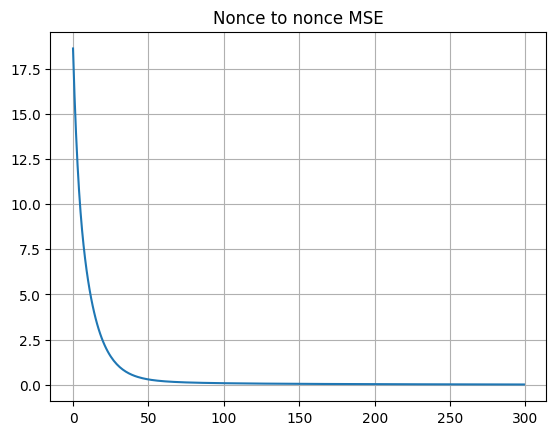

In [73]:
import matplotlib.pyplot as plt
import numpy as np

plt.title("Nonce to nonce MSE")
plt.plot(np.array(total_loss))
plt.grid()
plt.show()

In [75]:
name_vecs = np.concatenate([nonce_network.W(torch.LongTensor(all_freq_nnf)).detach().numpy(),
                            nonce_network.b(torch.LongTensor(all_freq_nnf)).detach().numpy(),
                            nonce_network.W_c(torch.LongTensor(all_freq_nnf)).detach().numpy(),
                            nonce_network.b_c(torch.LongTensor(all_freq_nnf)).detach().numpy()], axis=1)

In [79]:
nvdf = np.array(vdf.copy())
nvdf[all_freq_nnf] = name_vecs
nvdf = pd.DataFrame(nvdf)
nvdf

0         1         2         3         4         5         6    \
0     -0.000493  0.029432 -0.073276  0.200651 -0.170218 -0.097110 -0.105997   
1      0.053648 -0.081145  0.284485  0.120928 -0.093433 -0.049167  0.000374   
2      0.034252  0.100823  0.023131  0.061581 -0.091798 -0.112899 -0.114788   
3     -0.041380 -0.186123 -0.238965 -0.066747  0.186845  0.106081 -0.250341   
4     -0.168843  0.125099  0.076632  0.100672 -0.040765 -0.264709  0.264365   
...         ...       ...       ...       ...       ...       ...       ...   
20759 -0.025795  0.234238 -0.076611 -0.033742  0.100465 -0.221455  0.278392   
20760  0.126255  0.306041 -0.227680  0.341161  0.588815 -0.819221  0.575646   
20761 -0.187688  0.115590 -0.011260  0.217244  0.076753 -0.366490  0.280196   
20762 -0.091995 -0.075369 -0.024135  0.110620 -0.127078 -0.539675  0.236712   
20763 -0.001664  0.000190 -0.000144 -0.001634  0.000306 -0.000927 -0.001596   

            7         8         9    ...       592       593       594  \
0     -0.173410  0.193280 -0.154607  ...  0.022020  0.045551 -0.226583   
1     -0.324650  0.183834 -0.039084  ...  0.079693  0.007204 -0.044903   
2     -0.057552  0.080774 -0.194319  ...  0.048141  0.126965 -0.076789   
3     -0.182332  0.173760  0.034888  ...  0.093535 -0.220625 -0.280877   
4     -0.153585 -0.259497  0.296698  ... -0.109560  0.176415  0.346707   
...         ...       ...       ...  ...       ...       ...       ...   
20759 -0.138198  0.551552  0.089861  ... -0.301901 -0.065010  0.138358   
20760 -0.988080  0.639461  1.086212  ...  1.614937  0.438503  1.372180   
20761  0.084396  0.186494  0.254390  ... -0.031509 -0.009543 -0.242737   
20762  0.040846  0.499857  0.288973  ...  0.168737 -0.079603 -0.164294   
20763 -0.000373 -0.001149  0.000051  ...  0.000196  0.001009  0.001664   

            595       596       597       598       599       600       601  
0     -0.049600 -0.124576 -0.139002  0.008754  0.042013  0.039906  9.952419  
1      0.067786 -0.143698 -0.176114 -0.263069  0.074757  0.166795  7.601629  
2     -0.047092  0.010548 -0.105780 -0.081761 -0.129594 -0.026603  6.614210  
3      0.243746 -0.024856 -0.213180 -0.063363 -0.055134 -0.172561 -0.869568  
4     -0.181826 -0.765112 -0.367015  0.249050 -0.185705 -0.054963 -2.132403  
...         ...       ...       ...       ...       ...       ...       ...  
20759 -0.257259 -0.021323  0.000889 -0.080305 -0.359388  0.217326 -2.068346  
20760 -0.111566 -0.062557 -0.199282  0.632713 -0.907962 -1.062720 -0.602738  
20761 -0.169332  0.258697  0.116010  0.012849 -0.339240 -0.001735 -3.483632  
20762 -0.114298  0.151122  0.061755  0.043134 -0.332331 -0.017255 -2.992071  
20763  0.000764  0.001435  0.000998  0.000133 -0.000660 -0.001262  0.001324  

[20764 rows x 602 columns]

In [80]:
nvdf.to_csv(FOLDER/'name-dict-freq-nonce-glove-1.csv', sep='\t', encoding='utf-8')

c:\users\alexandra\desktop\grammar_ru\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\alexandra\desktop\grammar_ru\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


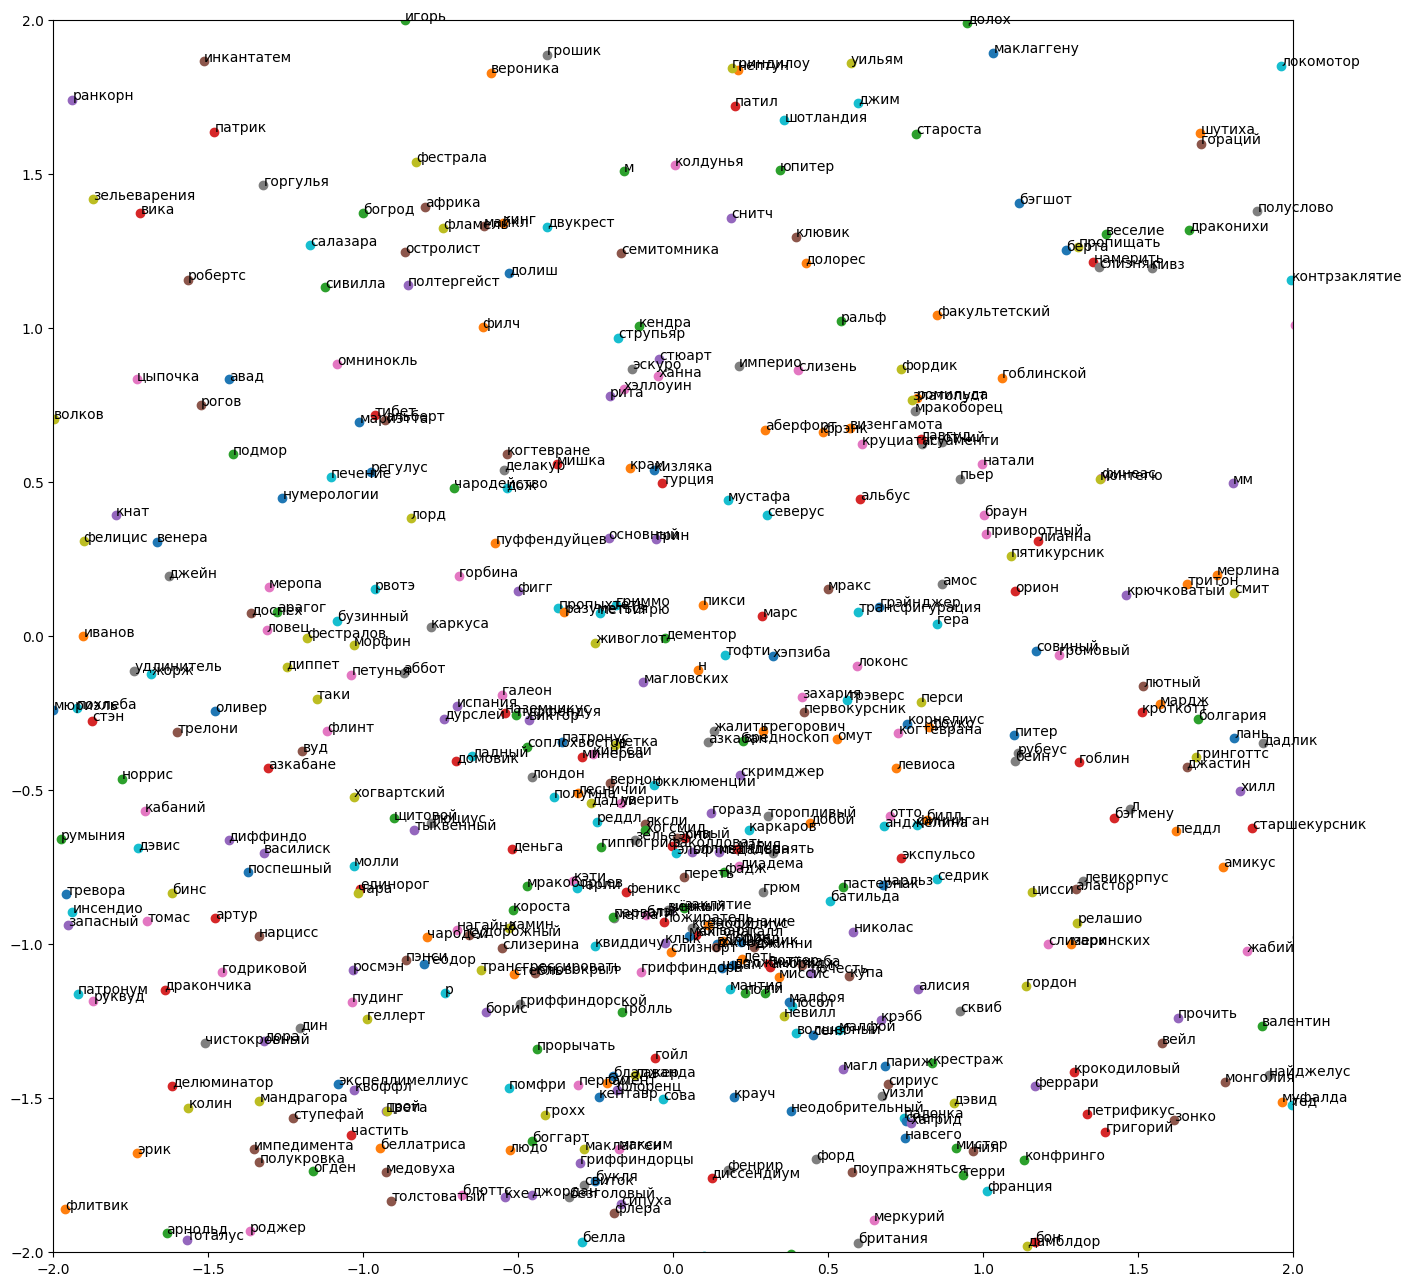

In [84]:
from sklearn.manifold import TSNE

reset = db.nfs.reset_index()
nf_to_id = reset.set_index('nf').nf_n.to_dict()

vectors = []
words = []
for nf, nf_id in nf_to_id.items():
    if nf_id in all_freq_nnf:
        words.append(nf)
        vectors.append(nvdf.iloc[nf_id])
tsne_values = TSNE(n_components=2).fit_transform(np.array(vectors))

plt.figure(figsize=(16, 16))
for i in range(len(tsne_values)):
    x, y = tsne_values[i]
    plt.scatter(x, y)
    plt.annotate(words[i], xy=(x, y))
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plt.show()

HP 4

In [157]:
def get_cos_dist(x, y):
    x_mod = np.sum(x * x) ** 0.5
    y_mod = np.sum(y * y) ** 0.5
    return np.sum(x * y) / (x_mod * y_mod)

harry = nvdf.iloc[word_to_normal_form['гарри']]
potter = nvdf.iloc[word_to_normal_form['поттер']]
draco = nvdf.iloc[word_to_normal_form['поттер']]
malfoy = nvdf.iloc[word_to_normal_form['поттер']]
mcgonagall = nvdf.iloc[word_to_normal_form['макгонагалл']]
snape =  nvdf.iloc[word_to_normal_form['снегг']]
gryffindor = nvdf.iloc[word_to_normal_form['гриффиндор']]
slytherin = nvdf.iloc[word_to_normal_form['слизерин']]
crabbe = nvdf.iloc[word_to_normal_form['крэбб']]
goyle = nvdf.iloc[word_to_normal_form['гойл']]
fred = nvdf.iloc[word_to_normal_form['фред']]
george = nvdf.iloc[word_to_normal_form['джордж']]

In [156]:
get_cos_dist(mcgonagall - gryffindor + slytherin, snape)

0.626440792126583

In [160]:
get_cos_dist(crabbe, goyle)

0.6740218893854371

In [161]:
get_cos_dist(fred, george)

0.8782776505900715

In [159]:
king = nvdf.iloc[word_to_normal_form['король']]
queen = nvdf.iloc[word_to_normal_form['королева']]
man = nvdf.iloc[word_to_normal_form['мужчина']]
woman = nvdf.iloc[word_to_normal_form['женщина']]
get_cos_dist(king - man + woman, queen)

0.7825933765329974

In [214]:
nonce_in_regular_context = (common_cooc[common_cooc['nf_index'].isin(all_freq_nnf) & 
                                        ~common_cooc['context_nf_index'].isin(all_freq_nnf)]
                            .rename(columns={'nf_index': 'trainable', 'context_nf_index': 'pretrained'}))

nonce = nvdf.iloc[mini['trainable']].iloc[:, :300].reset_index(drop=True)
context = nvdf.iloc[mini['pretrained']].iloc[:, 301:601].reset_index(drop=True)
mul_sum = pd.np.multiply(nonce, context).sum(axis=1)
final_sum = (mul_sum 
             + nvdf.iloc[mini['trainable']].iloc[:, 300].reset_index(drop=True)
             + nvdf.iloc[mini['pretrained']].iloc[:, 601].reset_index(drop=True))

C:\Users\Alexandra\AppData\Local\Temp\ipykernel_11704\931205592.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  mul_sum = pd.np.multiply(nonce, context).sum(axis=1)
C:\Users\Alexandra\AppData\Local\Temp\ipykernel_11704\931205592.py:7: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  mul_sum = pd.np.multiply(nonce, context).sum(axis=1)


In [222]:
np.sum((final_sum - mini['label']) ** 2)

0.14276497377685485

In [227]:
a = nvdf.iloc[word_to_normal_form['близкий']]
b = nvdf.iloc[word_to_normal_form['ближний']]
get_cos_dist(a, b)

0.33871636482429296

In [18]:
tuning_candidates = pd.read_csv(Loc.data_cache_path/'tuning_candidates.csv', sep='\t').set_index('nf_n')
all_freq_nnf = tuning_candidates[tuning_candidates.in_freq_prop | 
                                 tuning_candidates.is_name_by_cnt | 
                                 tuning_candidates.is_nonce_by_freq].index.values
vs = pd.read_csv(FOLDER/'name-dict-freq-nonce-glove-1.csv', sep='\t')
vs = vs.drop(columns=vs.columns[0])
id_to_nf = db.nfs.nf.to_dict()
taken_names = [id_to_nf[id_] for id_ in all_freq_nnf]
del id_to_nf

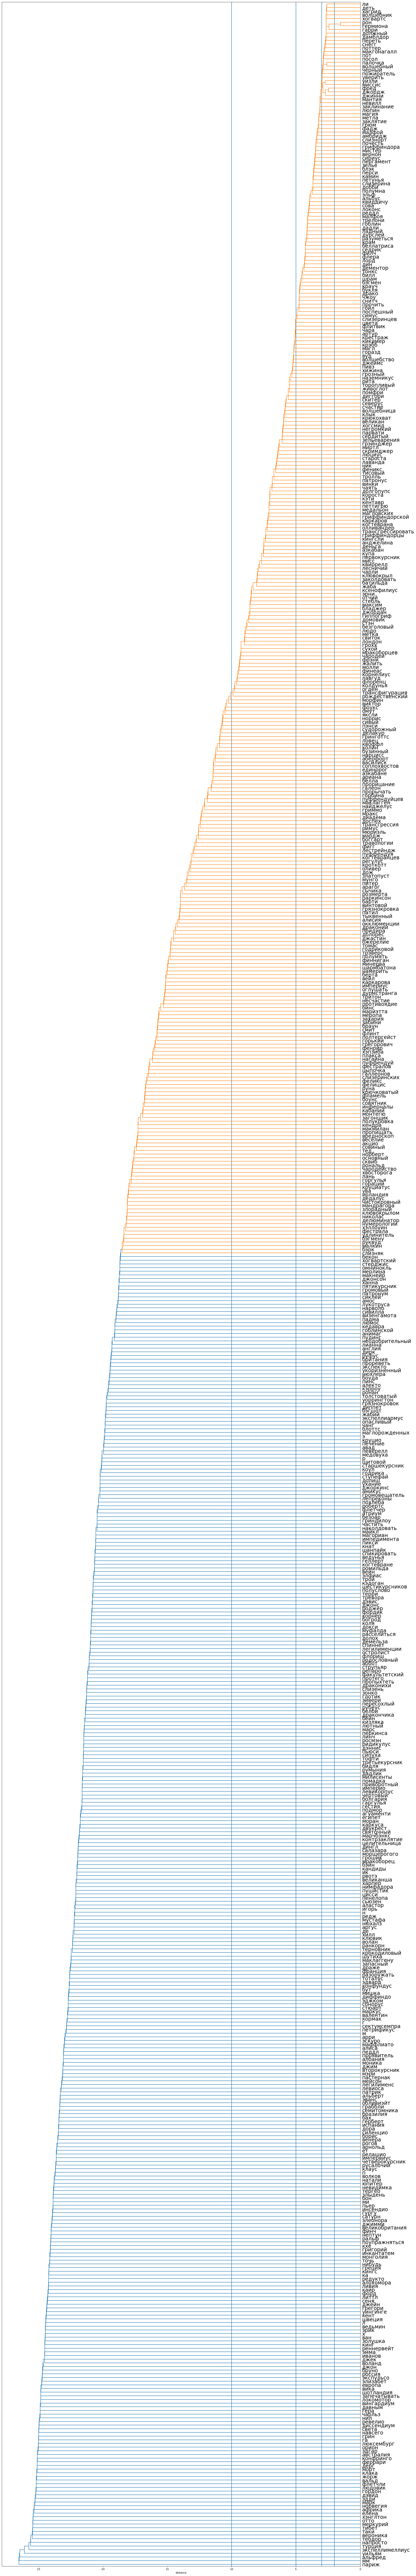

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(25, 180))
plt.xlabel('distance')
plt.vlines(2, 0, 10000)
plt.vlines(3, 0, 10000)
plt.vlines(5, 0, 10000)
plt.vlines(10, 0, 10000)

dendrogram(
    linkage(vs.iloc[all_freq_nnf], metric='euclidean'),
    leaf_font_size=20., 
    orientation='left',
    leaf_label_func=lambda v: taken_names[v]
)
plt.show()

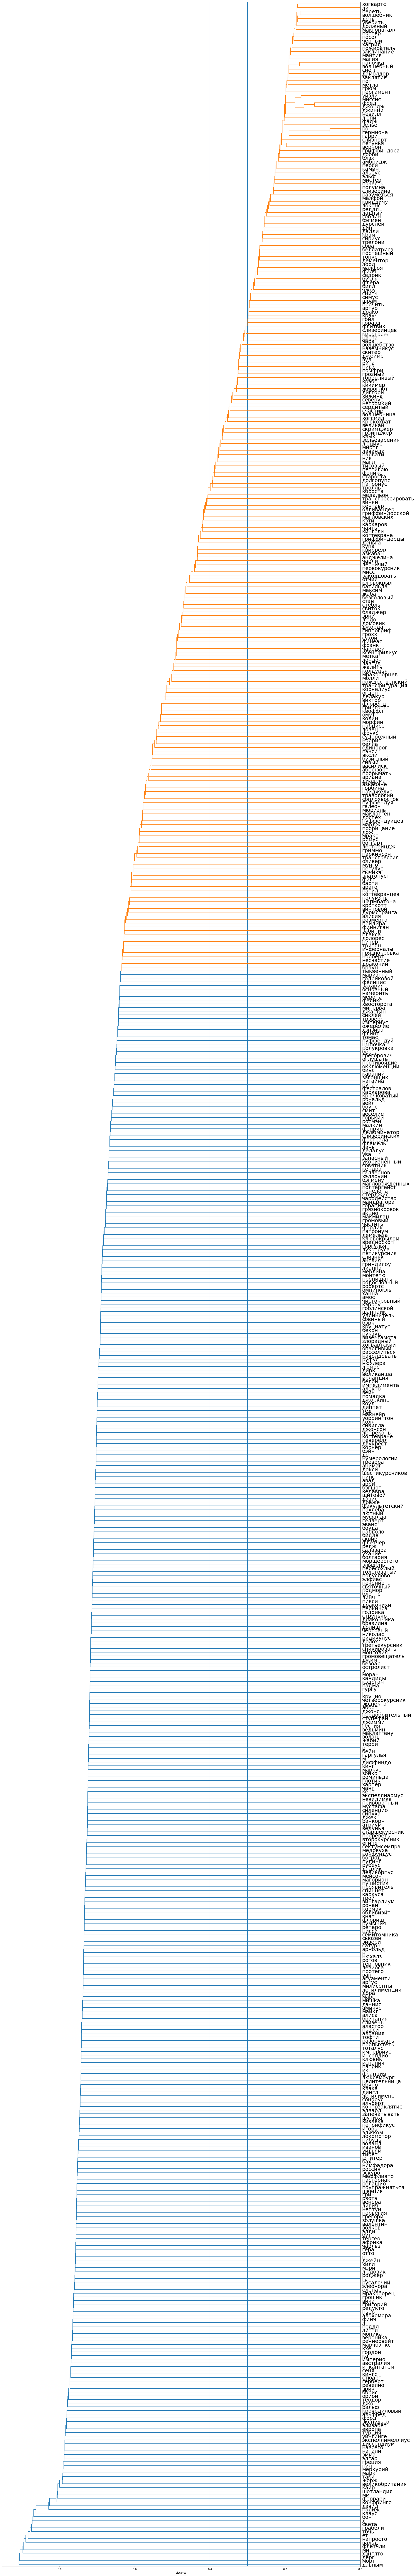

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(25, 180))
plt.xlabel('distance')
plt.vlines(0.2, 0, 10000)
plt.vlines(0.3, 0, 10000)
plt.vlines(0.4, 0, 10000)

dendrogram(
    linkage(vs.iloc[all_freq_nnf], metric='cosine'),
    leaf_font_size=20., 
    orientation='left',
    leaf_label_func=lambda v: taken_names[v]
)
plt.show()